# Stats labs Repeated measures t-test model using Bayesian estimation in STAN.

# Dowload data from https://sites.trinity.edu/osl/data-sets-and-activities/t-test-activities




In [2]:
# Import relveant libraries/packages.

%matplotlib inline
import pystan as ps
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import os


In [4]:
# Download data from URl provided above

#Change working directory to saved in home machine import dataset
os.chdir(r"C:\Users\harri\OneDrive\Documents\Stats 2")

#Read.csv file
df = pd.read_csv("Mehr Song and Spelke 2016 Experiment 1.csv")

df.head()

,id,study_code,exp1,exp2,exp3,exp4,exp5,dob,dot1,dot2,...,dtword13,dtnoword13,totsing14,babylike14,singcomf14,totrecord14,othersong14,dtword14,dtnoword14,filter_$
0,101,"""LUL""",1,0,0,,,09-Oct-12,29-Mar-13,05-Apr-13,...,0,0,,,,,,0,0,1
1,102,"""LUL""",1,0,0,,,16-Nov-12,10-May-13,17-May-13,...,0,0,,,,,,0,0,1
2,103,"""LUL""",1,0,0,,,26-Nov-12,11-May-13,20-May-13,...,0,0,,,,,,0,0,1
3,104,"""LUL""",1,0,0,,,19-Nov-12,11-May-13,18-May-13,...,0,0,,,,,,0,0,1
4,105,"""LUL""",1,0,0,,,29-Nov-12,15-May-13,29-May-13,...,0,0,4,3,4,0,0,0,0,1


In [15]:
# Extract the first 32 rows as the Mehr, Song and Spelke 
# dataset as these data points are for the first experiment
#tocreate a reduced dataset.

red_df = df.iloc[0:32,]
red_df.head();

# Mehr Song and Spelke 2016 Experiment 1

#  Mehr, Song, and Spelke (2016) research  sought to explore musics  psychological function between parents and infants.By testing the hypothesis that particular melodies convey social information to infants. Fcousing on social affiliation specifically.

# The author argue for a cultural difference in melodies heard that coicide with social group. I.e. diffetrn cultrure differnet melodies.

# 32 infants were recruited. The parent and child would come to the lab for a first visit to learn a new lullaby, singing that lullaby to the infant 1-2 weeks and then return for the experiment.

# Infants were then exposed to two unfamilar faces, the infants baseline gaze to new faces was recorded. in additon there was a experiemetnal phase after baseline recordings, which first required the infants to be exposed one by one to the unfamiliar faces singing lullabies, after this the faces were reshwon together at the proprtion of gaze from the infant was recorded.

# In the origna study the diffence bewteen the baseline and test gazes were analysed using a reapted (within-subjects) measures t-test.

# The STAN model below is designed to estimate a single vector of datapoints
# generated below by taking the differnce betweeen the two time points of data of BAseline and Test. Relcting the traditinal paired t-test with homogenity and comparing the mean difference between the tw time points of vaiance that does not take into account and random effects of the data.

# To see this shown in the requentist framwork see, 

# https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests#:~:text=As%20we%20saw%20above%2C%20a,t%2Dtest%20on%20the%20differences.

In [34]:
Within_t = """
data {
 int<lower=0> N;
 vector[N] diff;

}

parameters{
real<lower= 0> mu;
real sigma;

}

model{

//priors


// Likliehood
 diff ~ normal(mu, sigma);

}
"""

In [35]:
diff = red_df.loc[:,"Baseline_Proportion_Gaze_to_Singer"] - red_df.loc[:,"Test_Proportion_Gaze_to_Singer"]
diff= diff.to_numpy()

within_data = {'N': len(diff), "diff": diff  }


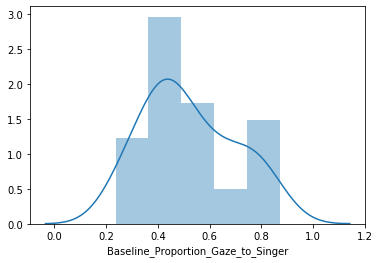

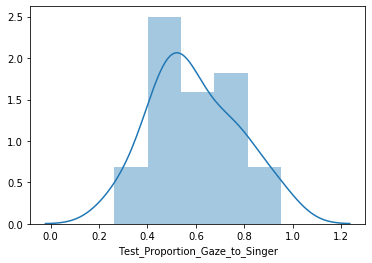

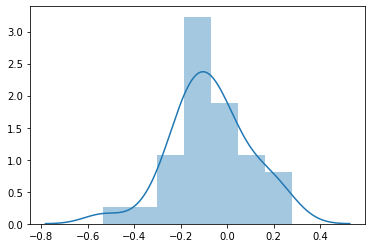

In [55]:
sns.distplot(red_df.loc[:,"Baseline_Proportion_Gaze_to_Singer"])
plt.show()
sns.distplot(red_df.loc[:,"Test_Proportion_Gaze_to_Singer"])
plt.show()
sns.distplot(diff)
plt.show()

In [36]:
sm = ps.StanModel(model_code = Within_t)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_841834cc9e2abdb5e82d3dc5dc7fcb3d NOW.


In [47]:
fit = sm.sampling(data= within_data, iter=10000, chains=4, seed= 302675)
print(fit)
samples = fit.extract()

Inference for Stan model: anon_model_841834cc9e2abdb5e82d3dc5dc7fcb3d.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     -0.07  2.8e-4   0.03  -0.13  -0.09  -0.07  -0.05-8.7e-3  13072    1.0
sigma   0.18  2.3e-4   0.02   0.14   0.16   0.17   0.19   0.23  10975    1.0
lp__   40.22    0.01   1.06  37.34  39.79  40.55   41.0  41.28   7085    1.0

Samples were drawn using NUTS at Mon Nov 16 09:00:59 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E8A724988>,
      dtype=object)

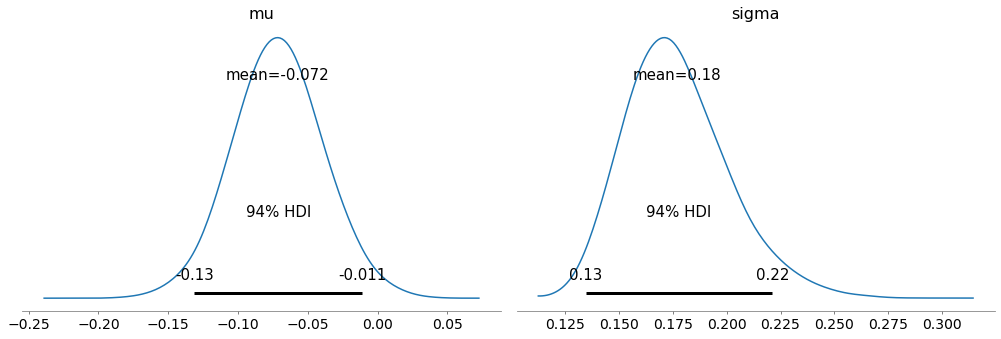

In [48]:
az.plot_posterior(fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E8B8BD648>,
      dtype=object)

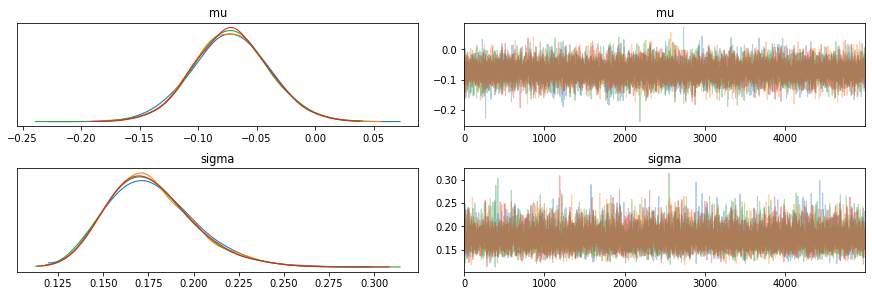

In [49]:
az.plot_trace(fit)

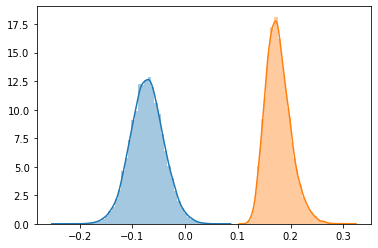

In [50]:
sns.distplot(samples['mu'])
sns.distplot(samples['sigma'])